In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


# Plot R1 activity data

In [2]:
import pandas as pd

df_R1 =  pd.read_excel('data/round1/wet-lab/mcs_uniq_join_duplicated-yh.xlsx', sheet_name='mcs_uniq_join_duplicated')
print(len(df_R1))

2396


In [3]:
df_R1_L1 = df_R1[df_R1['library'] == 'MC1'].copy()
df_R1_L2 = df_R1[df_R1['library'] == 'MC2_S3T'].copy()
df_R1_L3 = df_R1[df_R1['library'] == 'MC3'].copy()
df_R1_L4 = df_R1[df_R1['library'] == 'MC4'].copy()
df_R1_L5 = df_R1[df_R1['library'] == 'MC2_S3N'].copy()

df_R1_L1['Source'] = 'R1-L1'
df_R1_L2['Source'] = 'R1-L2'
df_R1_L3['Source'] = 'R1-L3'
df_R1_L4['Source'] = 'R1-L4'
df_R1_L5['Source'] = 'R1-L5'

df_R1_L1.sort_values('activity', ascending=True, inplace=True)
df_R1_L2.sort_values('activity', ascending=True, inplace=True)
df_R1_L3.sort_values('activity', ascending=True, inplace=True)
df_R1_L4.sort_values('activity', ascending=True, inplace=True)
df_R1_L5.sort_values('activity', ascending=True, inplace=True)

improving_ratios = [
    len(df_R1_L1[df_R1_L1['activity'] > 1]) / len(df_R1_L1),
    len(df_R1_L2[df_R1_L2['activity'] > 1]) / len(df_R1_L2),
    len(df_R1_L3[df_R1_L3['activity'] > 1]) / len(df_R1_L3),
    len(df_R1_L4[df_R1_L4['activity'] > 1]) / len(df_R1_L4),
]
print(len(df_R1_L1), len(df_R1_L2), len(df_R1_L3), len(df_R1_L4), len(df_R1_L5))
print(improving_ratios)
df_R1_L1.head(3)

518 525 522 475 356
[0.8185328185328186, 0.8304761904761905, 0.7816091954022989, 0.6905263157894737]


,id,library,chip_loc_id,chip_loc,sequence,savinase_mutations,n_muts,activity,is_in_mc,mut_not_in,is_dup,mean_activity,n_dup,act_max,act_min,act_min_max_diff,dup_locs,dup_activities,Source
2384,MC1-12-88-MP-F2_H04,MC1,MC1-12-88,MC1-12-H-04,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLGTGISTHPDLNIRGG...,D32G/A98S/P131S/F189S/Y209L/T213Y/N218S/A223S/...,10,0.000000,0,D32G/F189S,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R1-L1
2383,MC1-12-87-MP-F2_H03,MC1,MC1-12-87,MC1-12-H-03,AQVVPWGISRVQPPAAHNRGLTGSGVKVAVLDTGISTHPDLRIRGG...,S3V/A13P/N43R/N76D/V84L/A98G/G127R/P131S/S166N...,19,0.000000,0,A13P/V84L/G127R/S166N/Q191H/S216I/G219N/G229C/...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R1-L1
2357,MC1-5-85-MP-F2_H01,MC1,MC1-5-85,MC1-5-H-01,AQCVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLRIRGG...,S3C/N43R/A98K/P131G/G202S/Q206L/Y209L/T213Y/N2...,10,0.094801,0,G202S,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R1-L1


## Dot plots

In [8]:
import pandas as pd
from utils import plot_style_utils

def plot_data_dot_plots(df_data_to_plot, save_path='figures/round1/wetlab_R1_activity_merged', figsize=(16, 5), improving_ratios=None, ratio_x_locs=None, ratio_y_loc=1.5, label_y=4.0):
    plot_style_utils.set_pub_plot_context(context="talk")
    fig, ax = plot_style_utils.simple_ax(figsize=figsize)
    plot_style_utils.prettify_ax(ax)

    val_index = list(range(len(df_data_to_plot)))
    ax.plot(val_index, df_data_to_plot['activity'], 'o',  markersize=3, color='black')

    ax.set_ylabel('Fold improvement')
    ax.set_xlabel('# of samples')
    # add library annotations above the dots
    x_labels = list(df_data_to_plot['Source'].unique())
    n_values = [len(df_data_to_plot[df_data_to_plot['Source'] == source]) for source in x_labels]
    x_loc = [sum(n_values[:i]) + n_values[i]//2 if i > 0 else n_values[i]//2  for i in range(len(n_values))]

    if improving_ratios is not None:
        for i, ratio in enumerate(improving_ratios):
            ax.text(ratio_x_locs[i], ratio_y_loc, f'{ratio*100:.1f}%', ha='center')

    for i, x in enumerate(x_loc):
        ax.text(x, label_y, x_labels[i], ha='center')
    
    ax.axhspan(0, 1, color=[0.8, 0.8, 0.8], alpha=0.5) ## HARD CODED
    ax.axhline(1, color='r', linestyle='--')
    ax.axhline(3, color='y', linestyle='--')
    ax.set_ylim([0, 7]) ## HARD CODED
    plot_style_utils.save_for_pub(fig, path=save_path)

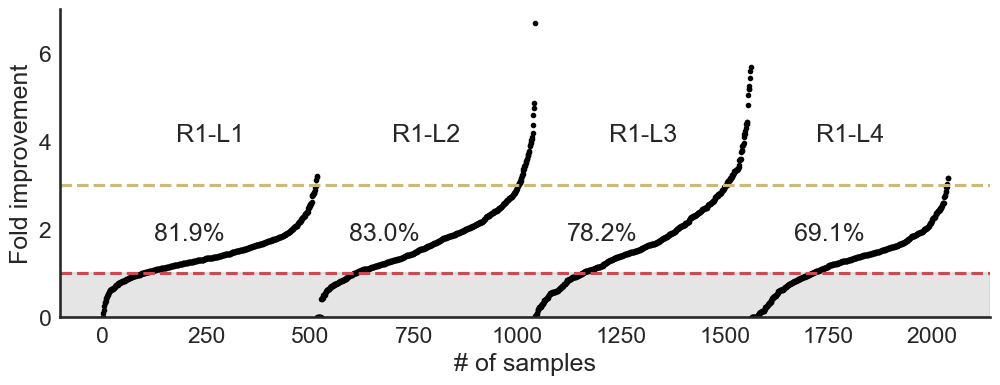

In [13]:
df_R1_data_to_plot = pd.concat([df_R1_L1, df_R1_L2, df_R1_L3, df_R1_L4])
df_R1_data_to_plot = df_R1_data_to_plot.reset_index()

ratio_x_locs=[len(df_R1_L1)//2 - 50, 
            len(df_R1_L1) + len(df_R1_L2)//2 - 100, 
            len(df_R1_L1) + len(df_R1_L2) + len(df_R1_L3)//2 - 100, 
            len(df_R1_L1) + len(df_R1_L2) + len(df_R1_L3) + len(df_R1_L4)//2 - 50]
plot_data_dot_plots(df_R1_data_to_plot, 
                    improving_ratios=improving_ratios, 
                    ratio_x_locs=ratio_x_locs,
                    ratio_y_loc=1.75,
                    save_path='figures/round1/wetlab_R1_activity_merged', figsize=(12, 4))